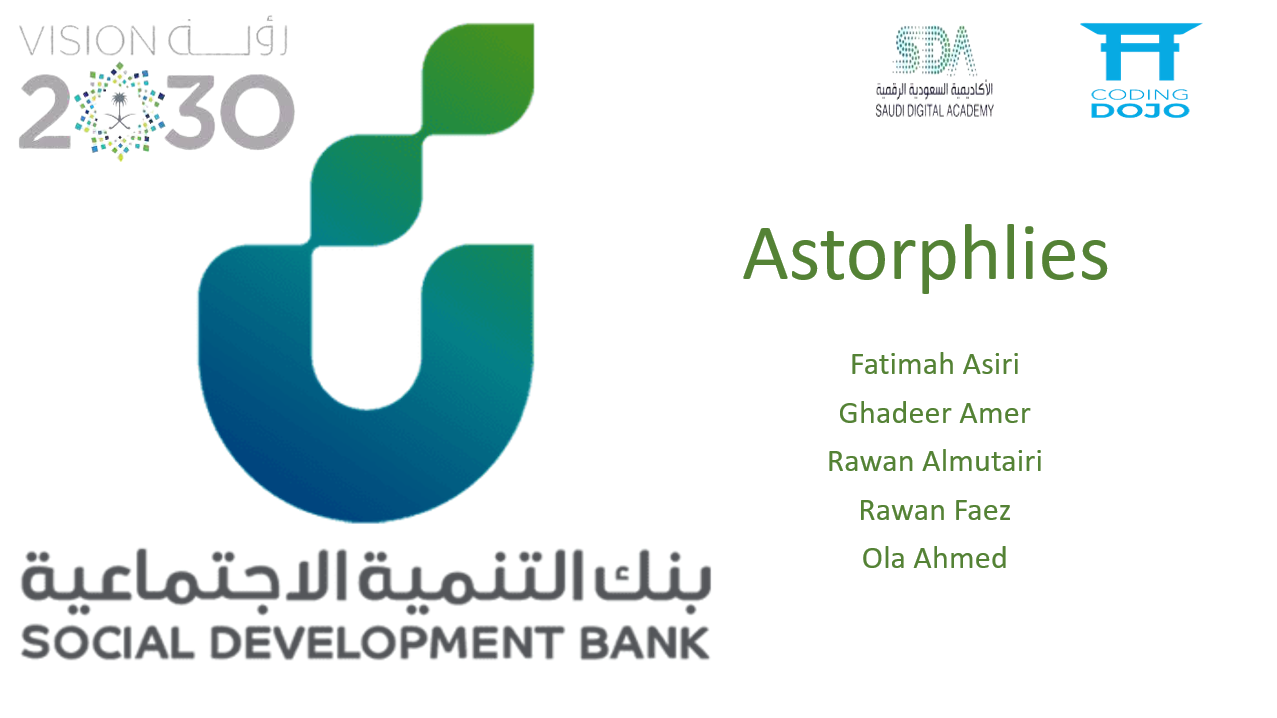

<hr>

##  Importing libraries

In [1]:
import numpy as np
import pandas as pd 

#Plot
import seaborn as sns
#plt.style.use("seaborn")
import matplotlib.pyplot as plt

#Feature Engineering 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

#Pipeline
from sklearn.pipeline import Pipeline

# Models
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

<h2>Loading Data</h2>

In [2]:
# load Data 
df=pd.read_csv('Social Development Bank Loans For 2019.csv')

df.head()

ID bank branch funding type funding classification  \
0   1       Tabūk       social                 family   
1   2        Hail      project               solution   
2   3       Tabūk       social               marriage   
3   4      Medina       social               marriage   
4   5      Medina       social                 family   

                    customer sector installment value cashing date     sex  \
0               government employee           >= 1000      2019/02    MALE   
1                               NaN           >= 1000      2019/01    MALE   
2               government employee           >= 1000      2019/02    MALE   
3  employee of a government company            < 1000      2019/03    MALE   
4           private sector employee           >= 1000      2019/02  FEMALE   

     age social status special needs number of family members saving loan  \
0  >= 30       married            No                    >= 05          No   
1   < 30        single            No                     < 02          No   
2   < 30       married            No                    >= 02          No   
3   < 30       married            No                    >= 10          No   
4  >= 30      divorced            No                    >= 02          No   

     income  financing value  
0    < 5000            60000  
1    < 5000           160000  
2   >= 7500            60000  
3   >= 5000            60000  
4  >= 10000            60000

<h3> Attribute Information:</h3>

<h2> Descriptive Statistics </h2>

In [3]:
print('Shape of dataset is ',df.shape)

Shape of dataset is  (11175, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11175 entries, 0 to 11174
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ID                        11175 non-null  int64 
 1   bank branch               11175 non-null  object
 2   funding type              11175 non-null  object
 3   funding classification    11175 non-null  object
 4   customer sector           7225 non-null   object
 5   installment value         11175 non-null  object
 6   cashing date              11175 non-null  object
 7   sex                       11175 non-null  object
 8   age                       11169 non-null  object
 9   social status             11175 non-null  object
 10  special needs             11175 non-null  object
 11  number of family members  11132 non-null  object
 12  saving loan               11175 non-null  object
 13  income                    11061 non-null  object
 14  financing value       

In [5]:
df.describe(include='all')

ID bank branch funding type funding classification  \
count   11175.000000       11175        11175                  11175   
unique           NaN          27            3                     12   
top              NaN      Riyadh       social               marriage   
freq             NaN        1661        10384                   7001   
mean     5588.000000         NaN          NaN                    NaN   
std      3226.088963         NaN          NaN                    NaN   
min         1.000000         NaN          NaN                    NaN   
25%      2794.500000         NaN          NaN                    NaN   
50%      5588.000000         NaN          NaN                    NaN   
75%      8381.500000         NaN          NaN                    NaN   
max     11175.000000         NaN          NaN                    NaN   

            customer sector installment value cashing date    sex    age  \
count                  7225             11175        11175  11175  11169   
unique                    6                 2            3      2      4   
top     government employee           >= 1000      2019/02   MALE   < 30   
freq                   3337              6896         5405   9849   5934   
mean                    NaN               NaN          NaN    NaN    NaN   
std                     NaN               NaN          NaN    NaN    NaN   
min                     NaN               NaN          NaN    NaN    NaN   
25%                     NaN               NaN          NaN    NaN    NaN   
50%                     NaN               NaN          NaN    NaN    NaN   
75%                     NaN               NaN          NaN    NaN    NaN   
max                     NaN               NaN          NaN    NaN    NaN   

       social status special needs number of family members saving loan  \
count          11175         11175                    11132       11175   
unique             5             2                        4           2   
top          married            No                    >= 02          No   
freq            9646         11038                     7929       10080   
mean             NaN           NaN                      NaN         NaN   
std              NaN           NaN                      NaN         NaN   
min              NaN           NaN                      NaN         NaN   
25%              NaN           NaN                      NaN         NaN   
50%              NaN           NaN                      NaN         NaN   
75%              NaN           NaN                      NaN         NaN   
max              NaN           NaN                      NaN         NaN   

         income  financing value  
count     11061     1.117500e+04  
unique        4              NaN  
top     >= 7500              NaN  
freq       3363              NaN  
mean        NaN     6.396923e+04  
std         NaN     4.743736e+04  
min         NaN     1.800000e+04  
25%         NaN     6.000000e+04  
50%         NaN     6.000000e+04  
75%         NaN     6.000000e+04  
max         NaN     2.116000e+06

<hr>

<h3>Missing value imputation</h3>

In [6]:
df.isnull().sum()

ID                             0
bank branch                    0
funding type                   0
funding classification         0
customer sector             3950
installment value              0
cashing date                   0
sex                            0
age                            6
social status                  0
special needs                  0
number of family members      43
saving loan                    0
income                       114
financing value                0
dtype: int64

#### Short explanation about missing values.
we have 4 column have missing values. <br>
 1- column customer sector  has 3950 values is missing. <br>
 2- column age has 6 values is missing. <br>
 3- column number of family members has 43 values is missing. <br>
 4- column income has 114 values is missing.

<h2>Handling Missing values</h2> 

<h4> 1- Column customer sector </h4>

<h5>Difine list for all values in customer sector column</h5>

In [7]:
# customer_sector_list created...
customer_sector_list = ['government employee', 'employee of a government company',
                        'private sector employee', 'Government retired',
                        'Retired insurances', 'Affiliate of the Association']

<h5>Counts values in customer sector column </h5>

In [8]:
# Counts values in customer sector column  
sum_customer_sector= df['customer sector'].value_counts().sum()
print('Number of values in column customer sector = ',sum_customer_sector)

Number of values in column customer sector =  7225


<h5>Divide eash value in column on sum of customer_sector to get probabilities for each value </h5>

In [9]:
# Divide eash value in column on sum of customer_sector
df['customer sector'].value_counts()/sum_customer_sector

government employee                 0.461869
private sector employee             0.432388
Government retired                  0.077647
employee of a government company    0.016747
Retired insurances                  0.010242
Affiliate of the Association        0.001107
Name: customer sector, dtype: float64

<h5> Create magical function </h5>

In [10]:
# Function  magical_func to fill missing values in column [customer sector] by random.choice
def magical_func ():
    customer_sector_list = ['government employee', 'employee of a government company',
                            'private sector employee', 'Government retired',
                            'Retired insurances', 'Affiliate of the Association']
    return np.random.choice(customer_sector_list, p=[0.461869, 0.432388, 0.077647, 0.016747, 0.010242, 0.001107])

<h5> Fill column [customer sector] by magical_func() </h5>

In [11]:
# Fill column [customer sector] by magical_func()
df['customer sector'].fillna(magical_func(),inplace = True)

<h5>Check is missing values is filling in column customer sector after handling</h5>

In [12]:
# Check is missing values is filling in column customer sector
print('Check about missing value after handling = ',df['customer sector'].isnull().sum())

Check about missing value after handling =  0


<h4> 2- Column income </h4>

<h5>Fill missing values in column [income] by mode value( >=7500 )</h5>

In [13]:
#Create variable income_ mode to find what is mode value in column income 
income_mode = df['income'].mode()[0]
income_mode
# Replace missing value by mode
df['income'] = df['income'].replace(np.NaN, income_mode)

<h4> 3- Column number of family members </h4> 

<h5>Fill missing values in column [ number of family members] by mode value( >=02 ) </h5>

In [14]:
#Create variable family_mode to find what is mode value in column number of family members
family_mode = df['number of family members'].mode()[0]
family_mode
# Replace missing value by mode
df['number of family members'] = df['number of family members'].replace(np.NaN,family_mode)

<h4> 4- Column number of age </h4> 

<h5>Fill missing values in column [ age ] by mode value( < 30 )</h5>

In [15]:
#Create variable age_mode to find what is mode value in column age
age_mode = df['age'].mode()[0]
age_mode
# Replace missing value by mode
df['age'] = df['age'].replace(np.NaN,age_mode)

#### Short explanation 
 Use mode for handling missing value in 3 columns becouse data type of columns is Categorical.

<h4>Check if missing values is handling</h4>

In [16]:
df.isnull().sum()

ID                          0
bank branch                 0
funding type                0
funding classification      0
customer sector             0
installment value           0
cashing date                0
sex                         0
age                         0
social status               0
special needs               0
number of family members    0
saving loan                 0
income                      0
financing value             0
dtype: int64

<hr>

<h2>EDA</h2>

#### What are the cities that take funds the most?

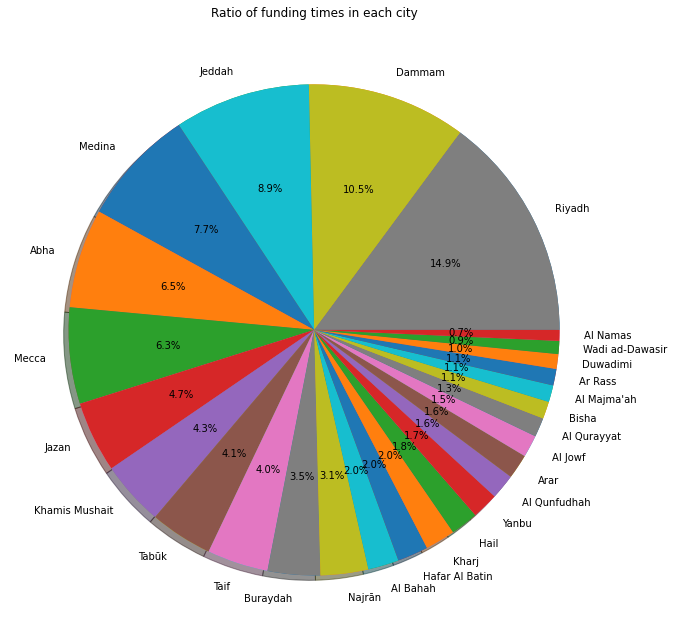

In [17]:
series = df['bank branch'].value_counts()

labels = series.index
values = series.values

plt.figure(figsize=(11,15))

plt.pie(values) 
plt.title('Ratio of funding times in each city')
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%');

##### Short explanation
    From the plot we see that the most funded city is Rigadh.
    Overall the biggest cities has alot of funds  for individuals and groups due to the size of area and Population.

### What is the most funded Classification?

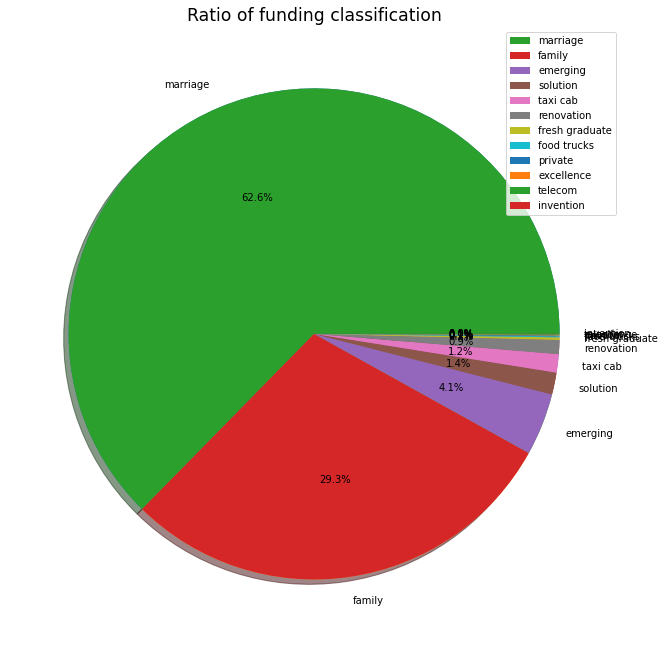

In [18]:
series = df['funding classification'].value_counts()

labels = series.index
values = series.values

plt.figure(figsize=(11,15))

plt.pie(values) 
plt.title('Ratio of funding classification',fontsize="xx-large")
plt.pie(values, labels = labels, shadow = True, autopct = '%1.1f%%')
plt.legend();

##### Short explanation
    Marriage is the most funed classification then family due to families that take loans to start their life.

### What is dimensions financing values for each funding type?

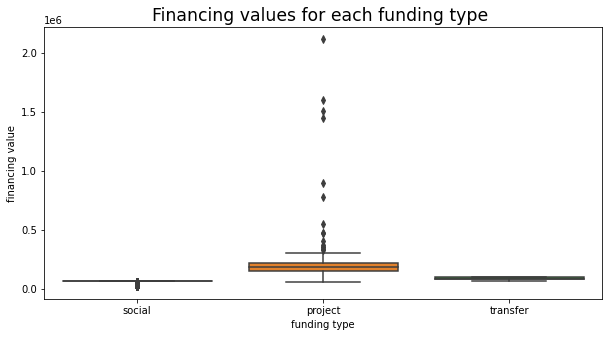

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, x='funding type',  y='financing value')
plt.title("Financing values for each funding type ",fontsize="xx-large");

#### Handling outliners

In [20]:
# First quartile (Q1)
Q1 = np.percentile(df['financing value'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(df['financing value'], 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

print('lower bound outliers is:',Q1 - 1.5 * (IQR))

lower bound outliers is: 60000.0


In [21]:
# Dropping the outliers from financing value column

df=df.drop(df[(df['financing value'] > 200000) | (df['financing value'] < 60000.0)].index)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


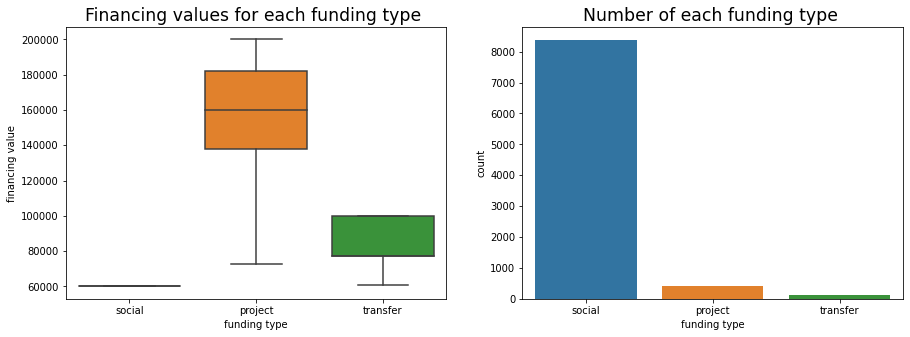

In [22]:
# The plot after handling

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.boxplot(x="funding type", y="financing value", data=df)
plt.title("Financing values for each funding type ",fontsize="xx-large") 


plt.subplot(1, 2, 2)
sns.countplot(df['funding type'])
plt.title("Number of each funding type ",fontsize="xx-large");

In [23]:
# Shape df after handing Outliners
print('Shape dataset after handing Outliners : ',df.shape)

Shape dataset after handing Outliners :  (8942, 15)


##### Short explanation
    we see the project type take the highest financing value Despite It take second place in the most wanted.
    Social is the most wanted and the lowest financing value.
    In Saudi arabia every male can have a loan for marriage without interest.

### Who is taking loans more male or female by age catgories?

In [24]:
# Grupe by to count financing value by sex and age

df2 = df.groupby(["sex", "age"])\
.count()["financing value"]\
.unstack("sex")\

df2.head()

sex    FEMALE  MALE
age                
< 30      142  4657
>= 30     292  1905
>= 40     428   895
>= 60     204   419

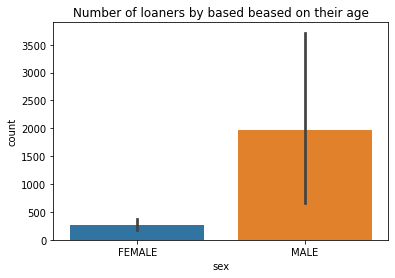

In [25]:
sns.barplot(data=df2)

plt.title("Number of loaners by based beased on their age",fontsize="large")
plt.ylabel('count');

##### Short explanation
    Male tends to take loans more than female
    In saudi arabia males responsable for financing the family due to that they have higher rates in taking loans.
    Also, males tends to take loans in their tweenies and female in forties.

### What is the income for the families that take loans?

In [26]:
# Grupe by to count financing value by sex and age

df3 = df.groupby(["number of family members",'income'])\
.count()["financing value"]\
.unstack("income")

df3.head()

income                    < 5000  >= 10000  >= 5000  >= 7500
number of family members                                    
< 02                         457        41        7       17
>= 02                       1454      1678     1171     2130
>= 05                        439       440      176      440
>= 10                        166       159       52      115

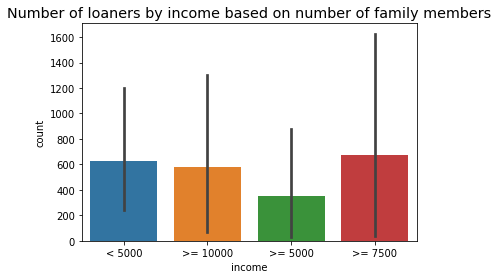

In [27]:
sns.barplot(data=df3)
plt.title("Number of loaners by income based on number of family members",fontsize="x-large")
plt.ylabel('count');

##### Short explanation
The number of families evenly distributed in each range of income.<br> We can say that Individuals can take loans that suit their income.

<hr>

<h2>Feature Engineering </h2>

<h3>One hot encodeing and label encodeing </h3>

<h4> 1- Delete columns ID, bank branch, cashing date, social status, specail needs, and saving loan</h4>

In [28]:
df.drop(['ID'], axis=1, inplace=True)
df.drop(['bank branch'], axis=1, inplace=True)
df.drop(['cashing date'], axis=1, inplace=True)
df.drop(['social status'], axis=1, inplace=True)
df.drop(['special needs'], axis=1, inplace=True)
df.drop(['saving loan'], axis=1, inplace=True)

<h4>2- One hot encoding for column fundig type</h4>

In [29]:
df7_model=pd.get_dummies(df['funding type'],drop_first=False)

In [30]:
df=pd.concat([df7_model,df],axis=1)

In [31]:
df.drop(['funding type'], axis=1, inplace=True)

<h4>3- One hot encoding for column fundig classification </h4>

In [32]:
df2_model=pd.get_dummies(df['funding classification'],drop_first=False)

In [33]:
df=pd.concat([df2_model,df],axis=1)

In [34]:
df.drop(['funding classification'], axis=1, inplace=True)

<h4> 4- One hot encoding for column customer sector</h4>

In [35]:
df3_model=pd.get_dummies(df['customer sector'],drop_first=False)

In [36]:
df=pd.concat([df3_model,df],axis=1)

In [37]:
df.drop(['customer sector'], axis=1, inplace=True)

<h4> 5- Label encoding for column instamllment value</h4>

In [38]:
df['installment value'].unique()

array(['>= 1000', '< 1000'], dtype=object)

In [39]:
# label_encoder object knows how to understand word labels.
le_installment_value = LabelEncoder()

# Encode labels in column 'installment value'.
df['installment value']= le_installment_value.fit_transform(df['installment value'])

df['installment value'].unique()

array([1, 0])

<h4>6 - One hot encoding for column sex</h4>

In [40]:
df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [41]:
df1_model=pd.get_dummies(df['sex'],drop_first=False)

In [42]:
df=pd.concat([df1_model,df],axis=1)

In [43]:
df.drop(['sex'], axis=1, inplace=True)

<h4>7- Label encoding for column age</h4>

In [44]:
df['age'].unique()

array(['>= 30', '< 30', '>= 60', '>= 40'], dtype=object)

In [45]:
# label_encoder object knows how to understand word labels.
le_age = LabelEncoder()

# Encode labels in column 'age'.
df['age']= le_age.fit_transform(df['age'])

df['age'].unique()

array([1, 0, 3, 2])

<h4> 8 - label encoding for column number of family members</h4>

In [46]:
df['number of family members'].unique()

array(['>= 05', '< 02', '>= 02', '>= 10'], dtype=object)

In [47]:
# label_encoder object knows how to understand word labels.
le_family = LabelEncoder()

# Encode labels in column 'number of family members'.
df['number of family members']= le_family.fit_transform(df['number of family members'])

df['number of family members'].unique()

array([2, 0, 1, 3])

<h4>9 - label encoding for column income</h4>

In [48]:
df['income'].unique()

array(['< 5000', '>= 7500', '>= 5000', '>= 10000'], dtype=object)

In [49]:
# label_encoder object knows how to understand word labels.
le_income = LabelEncoder()

# Encode labels in column 'income'.
df['income']= le_income.fit_transform(df['income'])

df['income'].unique()

array([0, 3, 2, 1])

<h3>End processig columns</h3>

<hr>

<h2>PCA </h2>

<h4>Split Data into X and y</h4>

In [50]:
# Save X data
#X Save columns it have index from 8 to 20 and column index 23
X = df.iloc[:, np.r_[8:20,23]]
# y is target of data
y = df['financing value']

In [51]:
# To show columns in X
X

emerging  family  food trucks  fresh graduate  marriage  renovation  \
0             0       1            0               0         0           0   
1             0       0            0               0         0           0   
2             0       0            0               0         1           0   
3             0       0            0               0         1           0   
4             0       1            0               0         0           0   
...         ...     ...          ...             ...       ...         ...   
11168         0       0            0               0         1           0   
11169         0       0            0               0         1           0   
11170         0       0            0               0         1           0   
11171         0       1            0               0         0           0   
11172         0       1            0               0         0           0   

       solution  taxi cab  telecom  project  social  transfer  income  
0             0         0        0        0       1         0       0  
1             1         0        0        1       0         0       0  
2             0         0        0        0       1         0       3  
3             0         0        0        0       1         0       2  
4             0         0        0        0       1         0       1  
...         ...       ...      ...      ...     ...       ...     ...  
11168         0         0        0        0       1         0       0  
11169         0         0        0        0       1         0       1  
11170         0         0        0        0       1         0       3  
11171         0         0        0        0       1         0       1  
11172         0         0        0        0       1         0       0  

[8942 rows x 13 columns]

In [52]:
#To Show Target
y

0         60000
1        160000
2         60000
3         60000
4         60000
          ...  
11168     60000
11169     60000
11170     60000
11171     60000
11172     60000
Name: financing value, Length: 8942, dtype: int64

<h4>Scale Data</h4>

In [53]:
# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit & transform data
scaled_df = scaler.fit_transform(X)

<h4>Apply PCA</h4>

In [54]:
# Select number of Components for pca 
# Use number of column in X
pca = PCA(n_components=13)

## Fit Scaled_df 
pcs = pca.fit_transform(scaled_df)

In [55]:
pcs

array([[ 2.14524395e-01, -2.22884248e-01,  2.29128737e+00, ...,
        -4.92408373e-13,  1.72581704e-13, -1.15306270e-13],
       [ 6.89256099e+00, -2.87297491e+00, -1.14075163e+00, ...,
         7.01659533e-14, -6.54822737e-14, -4.82299359e-16],
       [-8.95384712e-01,  1.18897473e-01, -1.09995951e+00, ...,
         8.93964476e-14, -1.63655156e-13,  1.52917018e-13],
       ...,
       [-8.95384712e-01,  1.18897473e-01, -1.09995951e+00, ...,
         8.64618518e-17,  1.57950145e-16, -1.04614973e-16],
       [ 3.63840370e-02, -1.62647196e-01,  2.11376274e+00, ...,
         1.67404062e-16, -2.79086960e-16, -1.91315651e-17],
       [ 2.14524395e-01, -2.22884248e-01,  2.29128737e+00, ...,
         9.52371952e-17, -2.69368869e-16,  3.26884287e-17]])

<h4>Varinace Ratio</h4>

In [56]:
# Get varinace ratio for each of columns
pd.Series(pca.explained_variance_ratio_) 

0     2.465236e-01
1     1.574747e-01
2     1.437200e-01
3     7.859677e-02
4     7.826283e-02
5     7.705215e-02
6     7.700171e-02
7     7.696435e-02
8     6.440385e-02
9     2.270940e-29
10    8.446832e-30
11    5.318597e-30
12    5.335022e-31
dtype: float64

<h4> Scree Plot </h4>

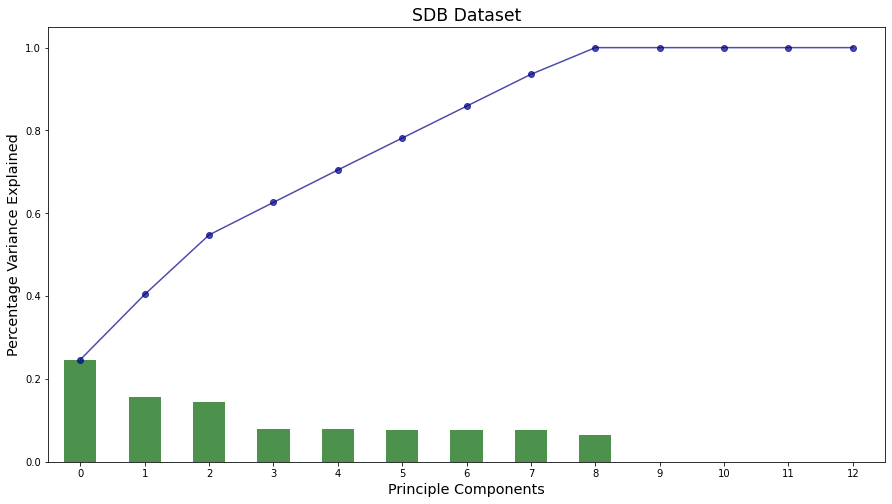

In [57]:
# size of plot
plt.figure(figsize=(15,8))

# exp_var variable have variance ratio
exp_var = pd.Series(pca.explained_variance_ratio_) 
# plot bar chart
exp_var.plot(kind="bar", alpha=0.7, color= 'darkgreen') 

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

#plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7, color = 'darkblue' ) 

plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("SDB Dataset", fontsize="xx-large")
plt.show();

<hr>

<h2> Buliding Models</h2>

<h3> Testing multiple models</h3>

<h4>Split Data into X1 and y1 </h4>

In [64]:
df.rename(columns = {'financing value':'financing_value'}, inplace = True)

# split data
X1 = df.drop(['financing_value','project','social','transfer','income'],
            axis=1)
y1= df['financing_value']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

<h4>Scale Data</h4>

In [65]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


<h3>1- Decision Tree</h3>

<h4> Build the model </h4>

In [69]:
# Build the model
reg_tree = DecisionTreeRegressor(random_state = 0, max_depth=3,criterion= 'mse')
reg_tree.fit(X_train_sc, y_train)

preds_tree = reg_tree.predict(X_test_sc)

C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


<h4>Score of Decision Tree</h4>

In [70]:
#Score of Decision Tree
print ('Score of Decision Tree')
print('---------------------------')
print('R2 : ',r2_score(y_true=y_test, y_pred=preds_tree))
print('MAE: ', mean_absolute_error(y_true=y_test, y_pred=preds_tree))
print('MSE: ',mean_squared_error(y_true=y_test, y_pred=preds_tree))
print('---------------------------')

Score of Decision Tree
---------------------------
R2 :  0.8801599720327484
MAE:  1346.4913224473946
MSE:  51028510.5647918
---------------------------


<h4>Plot the decision tree </h4>

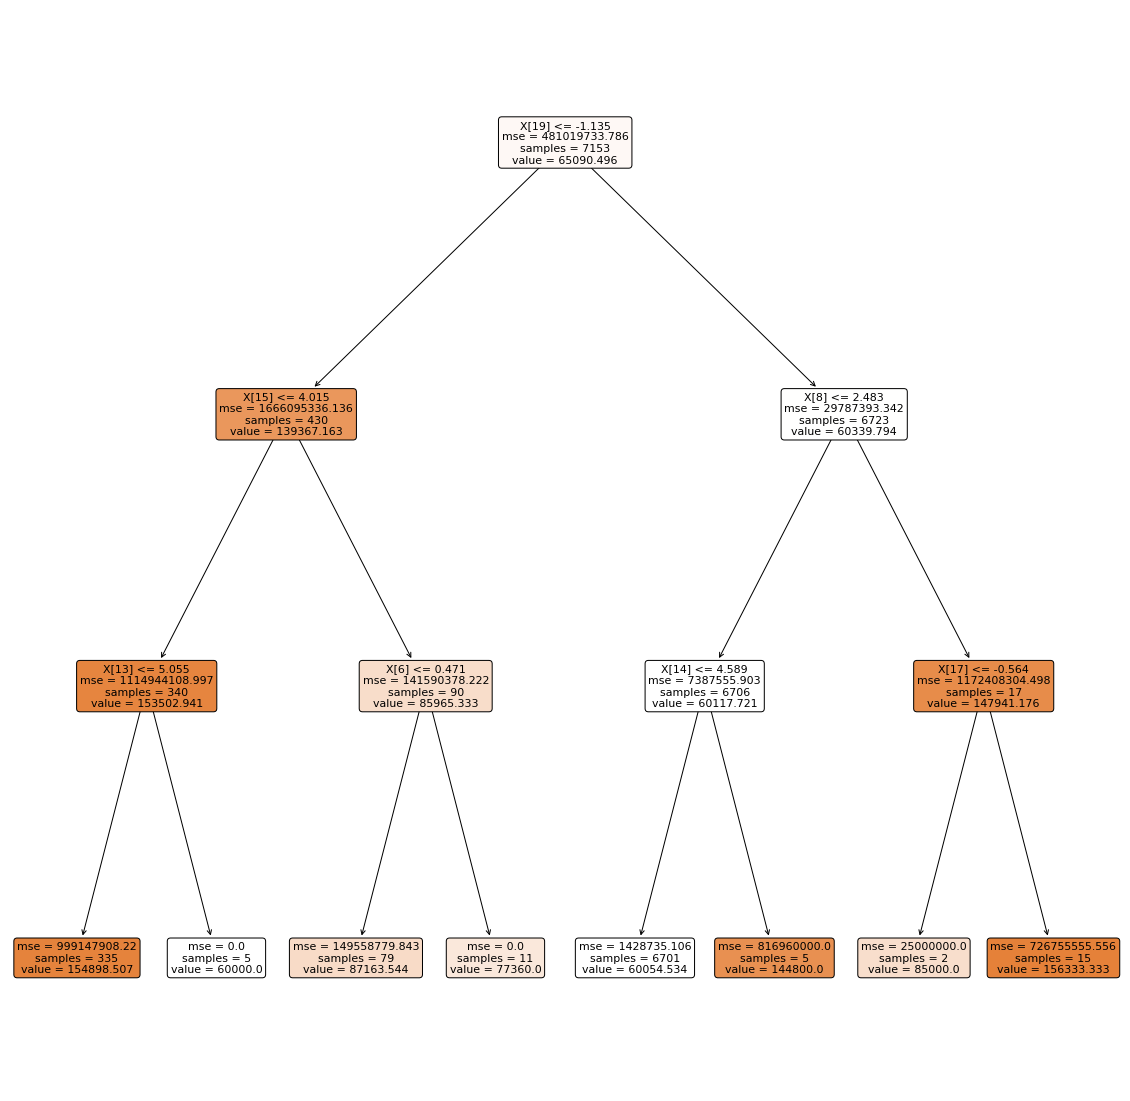

In [71]:
# Plot the decision tree
plt.figure(figsize=(20,20))

tree.plot_tree(
    reg_tree, 
    filled=True,
    rounded=True,  
);

<hr>

<h3> 2- LinearRegression</h3>

<h4>Build the model </h4>

In [72]:
# Build the model

reg_lin = LinearRegression()
reg_lin.fit(X_train_sc, y_train)

preds_lin = reg_lin.predict(X_test_sc)
#res = cost_functions(y_test, preds_lin)

In [73]:
print('Intercept of reg_lin : ',reg_lin.intercept_ )#b

Intercept of reg_lin :  65090.46911238153


In [74]:
print('Coef of reg_lin \n \n',reg_lin.coef_) #m

Coef of reg_lin 
 
 [ 1.41360640e+14  1.41360640e+14 -4.84073759e+11 -2.34865118e+14
 -6.98846294e+13 -5.08357813e+14 -4.73713484e+14 -4.67652340e+14
  2.88601284e+13  7.02075907e+13  4.83051308e+12  3.65229107e+12
  7.44013523e+13  1.49912249e+13  1.64459923e+13  1.86667111e+13
  3.65229107e+12  2.88226562e+02  3.89281250e+02 -1.87063965e+02]


<h4>Score of Linear Regression</h4>

In [75]:
#score
print ('Score of Linear Regression')
print('---------------------------')
print('R2 : ',r2_score(y_true=y_test, y_pred=preds_lin))
print('MAE: ', mean_absolute_error(y_true=y_test, y_pred=preds_lin))
print('MSE: ',mean_squared_error(y_true=y_test, y_pred=preds_lin))
print('SQRT : ',mean_squared_error(y_true=y_test, y_pred=preds_lin, squared= False))
print('---------------------------')

Score of Linear Regression
---------------------------
R2 :  -1.438221844132489e+18
MAE:  585077323991.5303
MSE:  6.1240238184761e+26
SQRT :  24746765078442.273
---------------------------


<hr>

### 3- Random Forest Regressor 

<h4> Build the model</h4>

In [76]:
# Build the model
reg_forest = RandomForestRegressor(n_estimators = 1, random_state = 0)
reg_forest.fit(X_train_sc, y_train)

preds_forest = reg_forest.predict(X_test_sc)

In [77]:
#score
print ('Score of Random Forest Regressor')
print('---------------------------------')
print('R2: ',r2_score(y_true=y_test, y_pred=preds_forest))
print('MAE: ', mean_absolute_error(y_true=y_test, y_pred=preds_forest))
print('MSE: ',mean_squared_error(y_true=y_test, y_pred=preds_forest))
print('---------------------------------')

Score of Random Forest Regressor
---------------------------------
R2:  0.8932944729988896
MAE:  1219.538784871228
MSE:  45435771.37169714
---------------------------------


<hr>

<center><h2> Tabel of Comparing between Models </h2></center><br>

   | | Score   | Decision Tree    | Linear Regression   | Random Forest Regressor   |
|---:|:-------------|:-----------|:------|:------|
|  | R2:  | 0.8802       | -1.438   |  0.893     |
|  | MAE:  | 1346.4913    | 585077323991.530   | 1219.539     |
|  | MSE:  | 51028510.5648    | 6.1240   | 45435771.372     |

<hr>

<h2> we are choose Random Forest Regressor to Get Grid search and Pipeline</h2>

<hr>

<h2> Grid search to determine the best hyperparameters</h2>

In [78]:
param_grid = {
    "n_estimators": [10,15,20,100,200],# number trees in our forest
    "max_depth": [5,7,9,12,15]  #how deep each decision tree can be
    
}
# GridSearch for Random Forest Regressor 
grid = GridSearchCV(
    reg_forest,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)
# Fit of grid
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 12, 15],
                         'n_estimators': [10, 15, 20, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [79]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.051863      0.002676         0.010265        0.004506   
1        0.077842      0.002813         0.010436        0.006515   
2        0.092970      0.001286         0.007039        0.001430   
3        0.411056      0.003448         0.018151        0.001163   
4        0.829548      0.004555         0.030614        0.001201   
5        0.057015      0.012681         0.013365        0.010005   
6        0.070925      0.001906         0.005585        0.001197   
7        0.091400      0.005823         0.006138        0.000430   
8        0.418196      0.003007         0.018719        0.001890   
9        0.840420      0.019044         0.047451        0.009780   
10       0.046734      0.001331         0.006383        0.001740   
11       0.072849      0.005813         0.008377        0.005411   
12       0.087964      0.001163         0.005984        0.000631   
13       0.466165      0.044851         0.032416        0.007515   
14       0.957463      0.012421         0.034639        0.002124   
15       0.052922      0.003517         0.010120        0.004797   
16       0.079279      0.007311         0.007835        0.002045   
17       0.097658      0.005294         0.007964        0.003520   
18       0.459047      0.012041         0.019807        0.003096   
19       0.857973      0.020016         0.030351        0.002138   
20       0.047192      0.001232         0.006444        0.002939   
21       0.069030      0.001587         0.005608        0.000509   
22       0.087486      0.001517         0.005636        0.000536   
23       0.415701      0.008147         0.017588        0.000992   
24       0.692011      0.026832         0.019707        0.002365   

   param_max_depth param_n_estimators                                  params  \
0                5                 10    {'max_depth': 5, 'n_estimators': 10}   
1                5                 15    {'max_depth': 5, 'n_estimators': 15}   
2                5                 20    {'max_depth': 5, 'n_estimators': 20}   
3                5                100   {'max_depth': 5, 'n_estimators': 100}   
4                5                200   {'max_depth': 5, 'n_estimators': 200}   
5                7                 10    {'max_depth': 7, 'n_estimators': 10}   
6                7                 15    {'max_depth': 7, 'n_estimators': 15}   
7                7                 20    {'max_depth': 7, 'n_estimators': 20}   
8                7                100   {'max_depth': 7, 'n_estimators': 100}   
9                7                200   {'max_depth': 7, 'n_estimators': 200}   
10               9                 10    {'max_depth': 9, 'n_estimators': 10}   
11               9                 15    {'max_depth': 9, 'n_estimators': 15}   
12               9                 20    {'max_depth': 9, 'n_estimators': 20}   
13               9                100   {'max_depth': 9, 'n_estimators': 100}   
14               9                200   {'max_depth': 9, 'n_estimators': 200}   
15              12                 10   {'max_depth': 12, 'n_estimators': 10}   
16              12                 15   {'max_depth': 12, 'n_estimators': 15}   
17              12                 20   {'max_depth': 12, 'n_estimators': 20}   
18              12                100  {'max_depth': 12, 'n_estimators': 100}   
19              12                200  {'max_depth': 12, 'n_estimators': 200}   
20              15                 10   {'max_depth': 15, 'n_estimators': 10}   
21              15                 15   {'max_depth': 15, 'n_estimators': 15}   
22              15                 20   {'max_depth': 15, 'n_estimators': 20}   
23              15                100  {'max_depth': 15, 'n_estimators': 100}   
24              15                200  {'max_depth': 15, 'n_estimators': 200}   

    split0_test_score  split1_test_score  split2_test_score  \
0        -1348.086574       -1403.953858       -1550.618998   
1 

In [80]:
parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']

grid_df[parameters]

param_max_depth param_n_estimators  mean_test_score  rank_test_score
0                5                 10     -1442.032343               25
1                5                 15     -1436.217533               24
2                5                 20     -1431.529493               23
3                5                100     -1424.802292               21
4                5                200     -1426.400509               22
5                7                 10     -1416.838460               19
6                7                 15     -1412.216022               14
7                7                 20     -1411.656695               13
8                7                100     -1403.098283                8
9                7                200     -1403.084055                7
10               9                 10     -1420.791367               20
11               9                 15     -1415.182004               18
12               9                 20     -1413.062922               16
13               9                100     -1400.603360                6
14               9                200     -1399.546328                5
15              12                 10     -1413.344241               17
16              12                 15     -1409.178161               11
17              12                 20     -1407.756256               10
18              12                100     -1395.406166                1
19              12                200     -1395.517751                2
20              15                 10     -1412.832400               15
21              15                 15     -1409.219466               12
22              15                 20     -1407.566969                9
23              15                100     -1395.875695                4
24              15                200     -1395.665212                3

In [81]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

param_max_depth param_n_estimators  mean_test_score  rank_test_score
18              12                100     -1395.406166                1
19              12                200     -1395.517751                2
24              15                200     -1395.665212                3
23              15                100     -1395.875695                4
14               9                200     -1399.546328                5
13               9                100     -1400.603360                6
9                7                200     -1403.084055                7
8                7                100     -1403.098283                8
22              15                 20     -1407.566969                9
17              12                 20     -1407.756256               10
16              12                 15     -1409.178161               11
21              15                 15     -1409.219466               12
7                7                 20     -1411.656695               13
6                7                 15     -1412.216022               14
20              15                 10     -1412.832400               15
12               9                 20     -1413.062922               16
15              12                 10     -1413.344241               17
11               9                 15     -1415.182004               18
5                7                 10     -1416.838460               19
10               9                 10     -1420.791367               20
3                5                100     -1424.802292               21
4                5                200     -1426.400509               22
2                5                 20     -1431.529493               23
1                5                 15     -1436.217533               24
0                5                 10     -1442.032343               25

In [82]:
print('Best score for Grid search : ',grid.best_score_)

Best score for Grid search :  -1395.4061662616912


In [83]:
print('Evalation of Grid search : ',grid.score(X_test, y_test))

Evalation of Grid search :  -1184.7193804159685


C:\Users\Fatimah Asiri\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  warnings.warn(


In [84]:
grid.best_params_

{'max_depth': 12, 'n_estimators': 100}

In [85]:
grid.best_estimator_.estimators_

[DecisionTreeRegressor(max_depth=12, max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_depth=12, max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_depth=12, max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_depth=12, max_features='auto',
                       random_state=1478610112),
 DecisionTreeRegressor(max_depth=12, max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_depth=12, max_features='auto',
                       random_state=1537364731),
 DecisionTreeRegressor(max_depth=12, max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_depth=12, max_features='auto',
                       random_state=1491434855),
 DecisionTreeRegressor(max_depth=12, max_features='auto',
                       random_state=1819583497),
 DecisionTreeRegressor(max_depth=12, max_features='auto', random_state=530702035),
 DecisionTreeRegressor(max_depth=12, max_features='auto', random_state=626

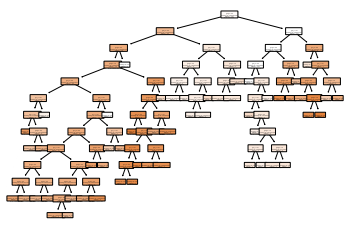

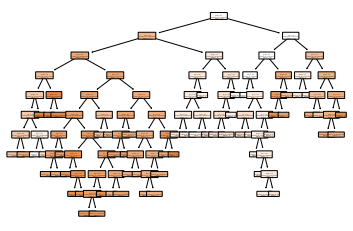

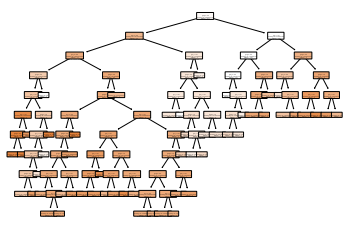

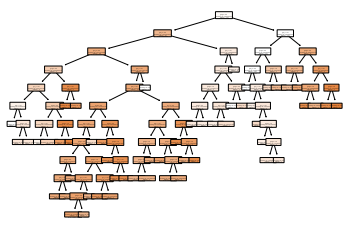

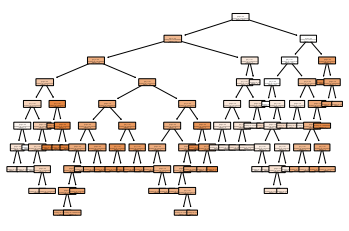

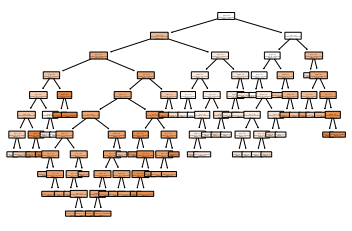

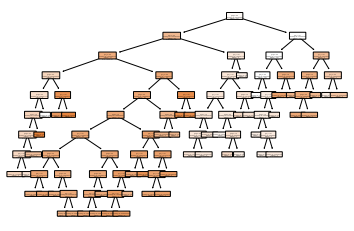

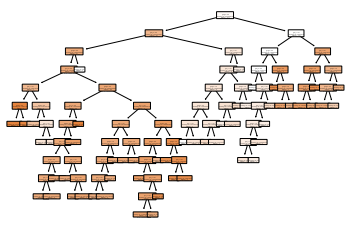

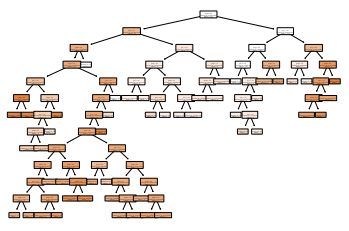

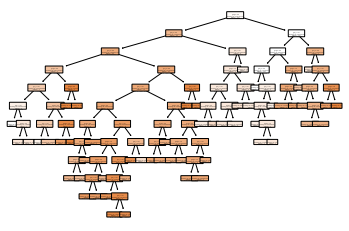

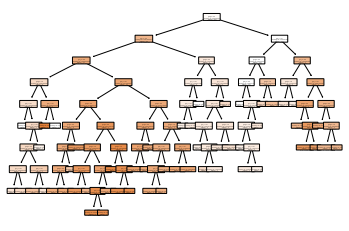

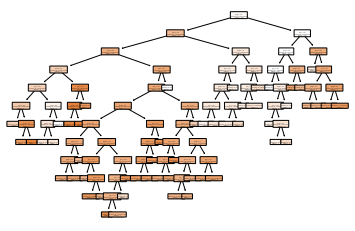

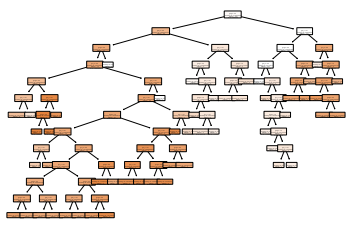

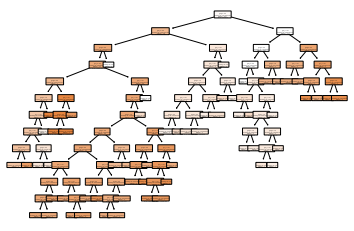

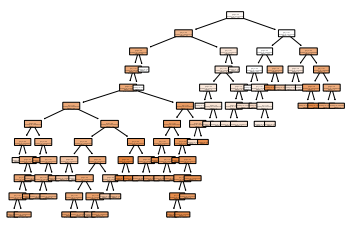

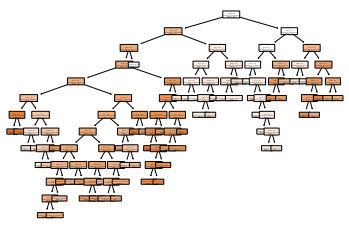

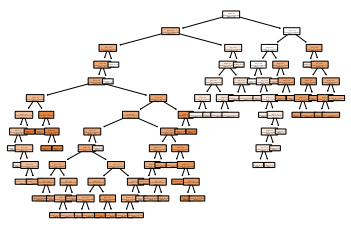

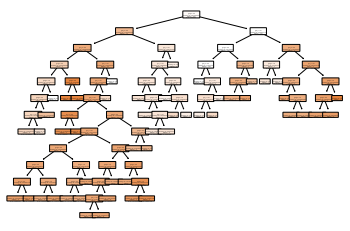

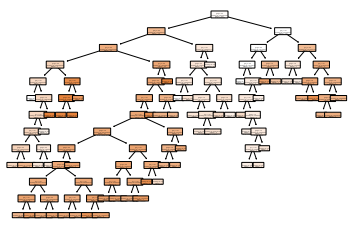

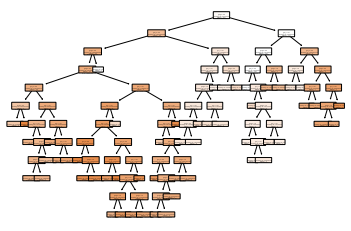

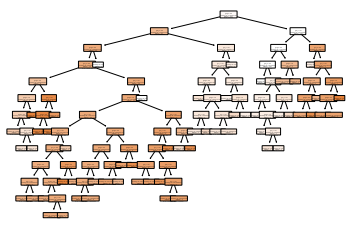

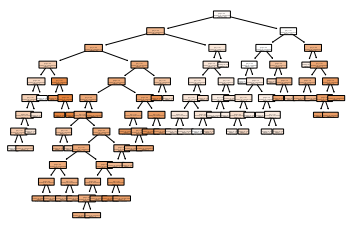

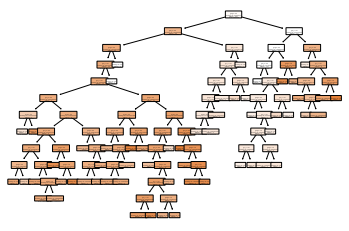

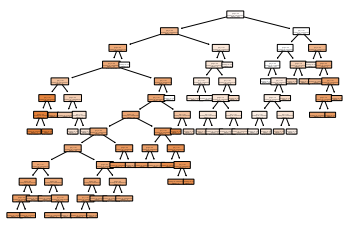

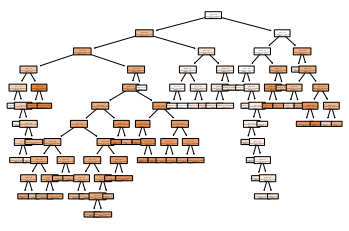

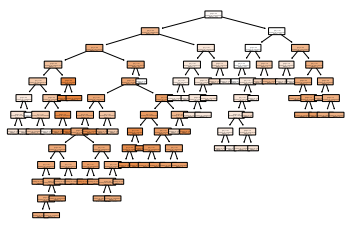

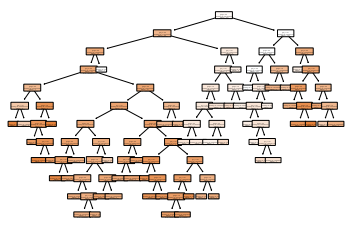

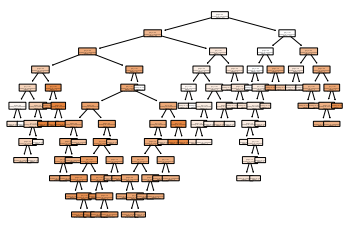

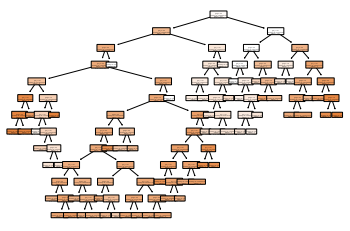

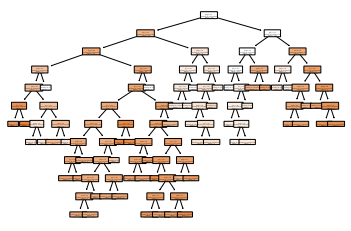

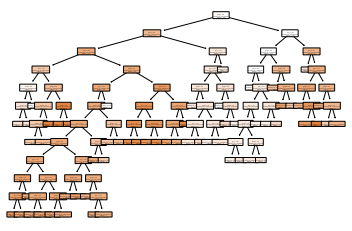

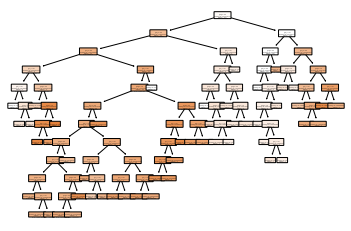

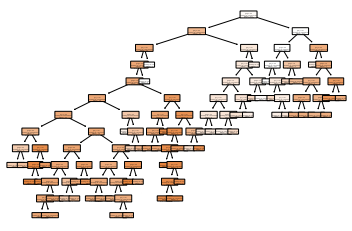

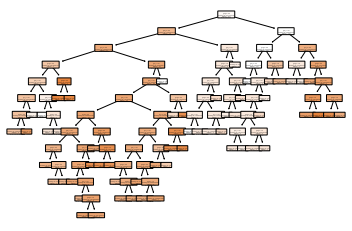

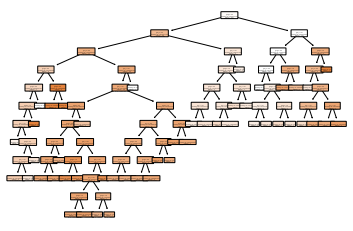

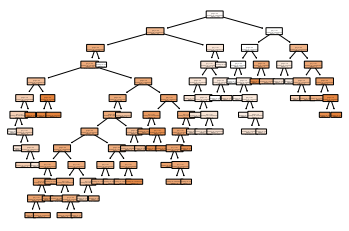

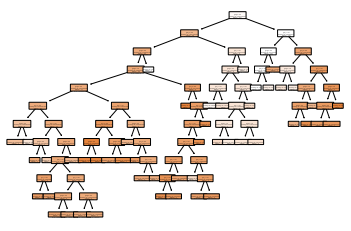

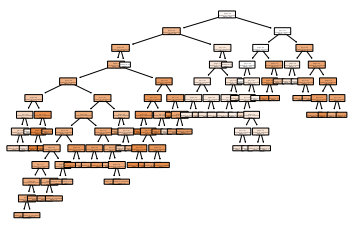

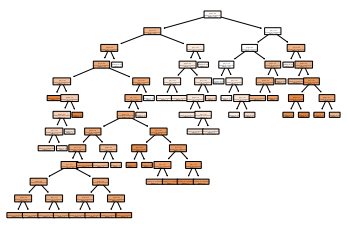

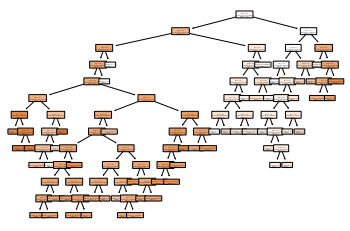

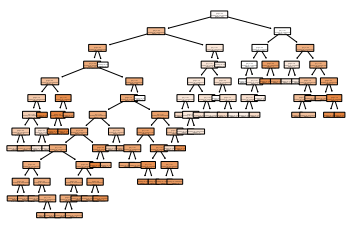

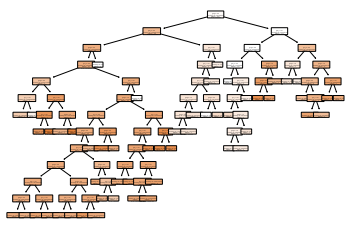

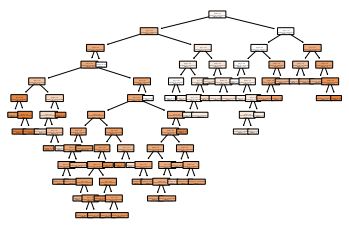

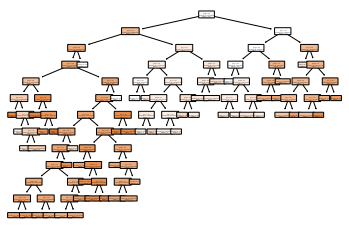

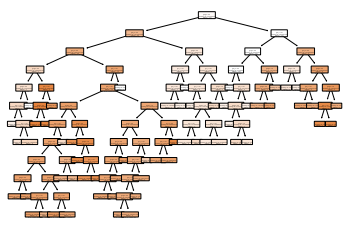

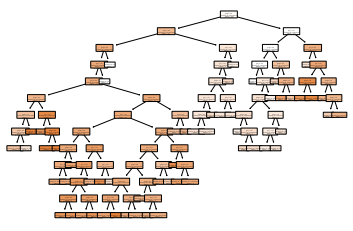

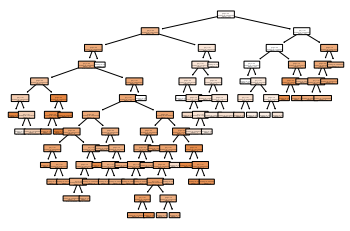

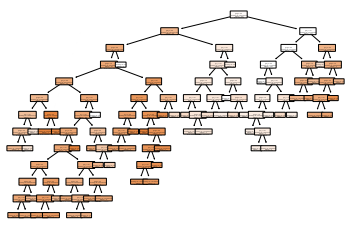

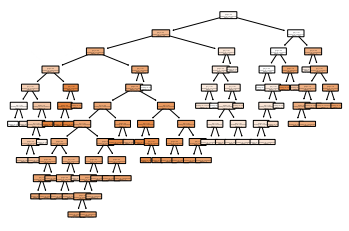

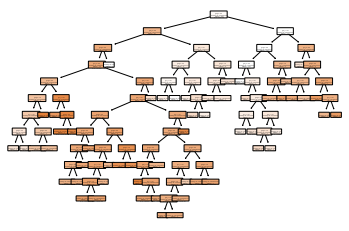

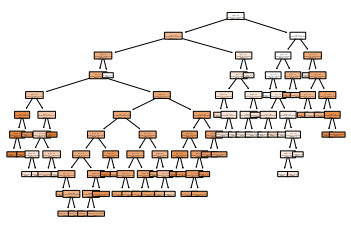

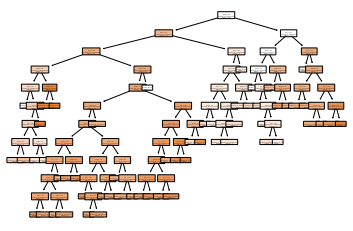

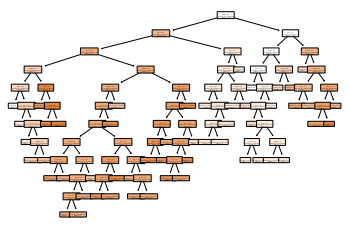

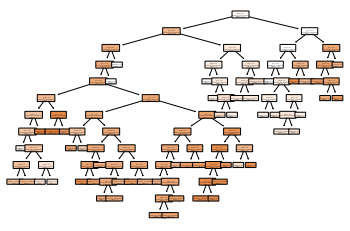

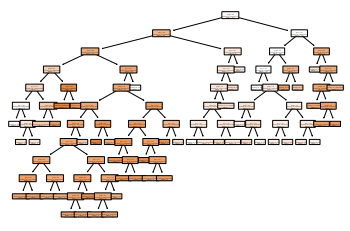

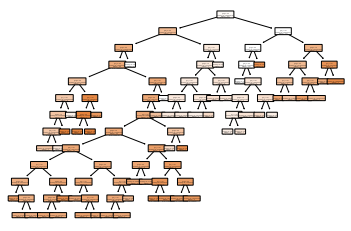

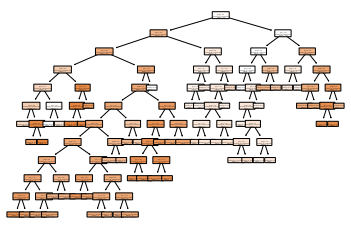

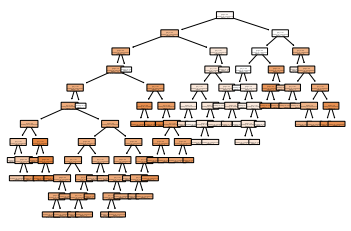

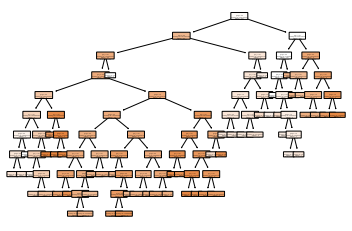

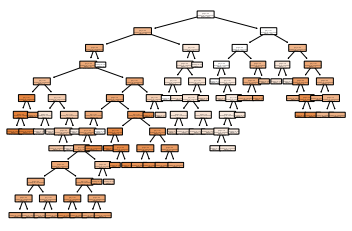

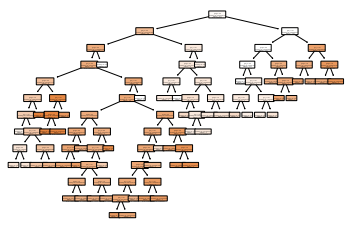

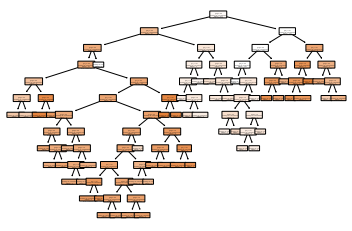

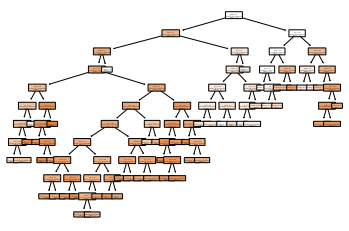

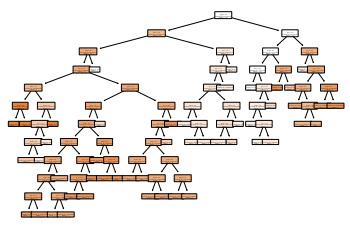

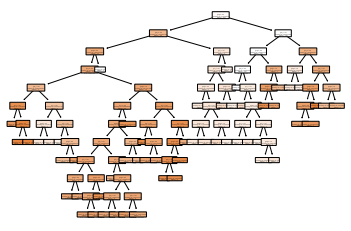

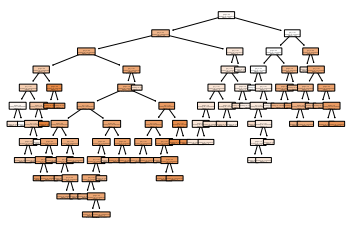

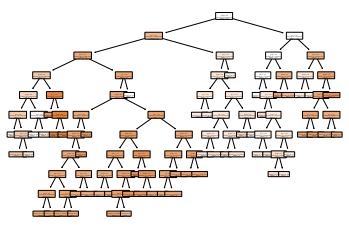

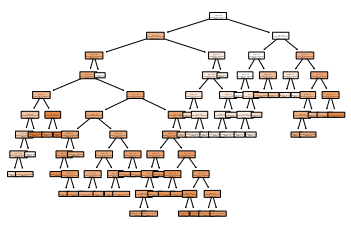

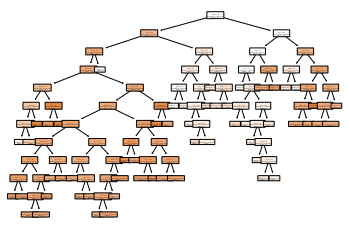

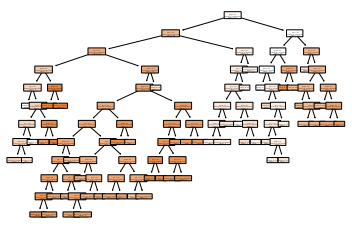

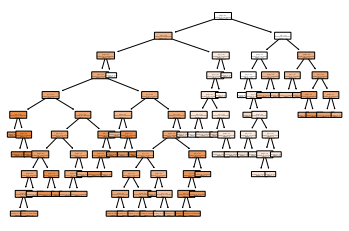

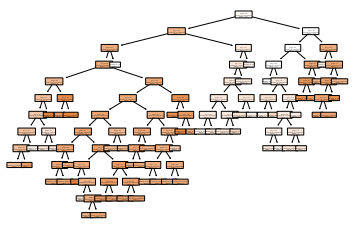

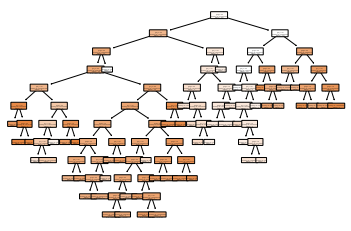

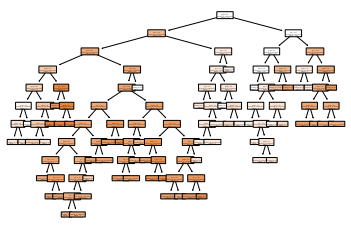

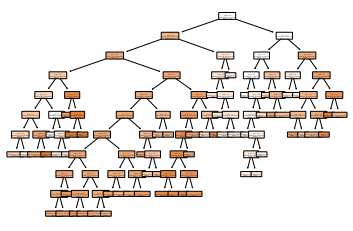

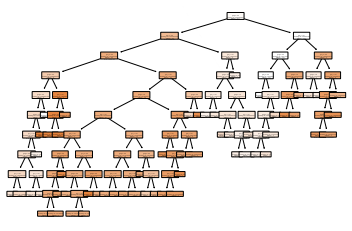

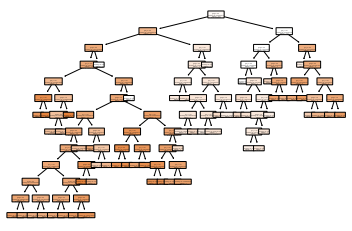

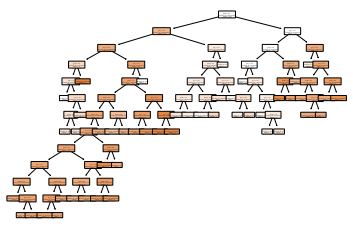

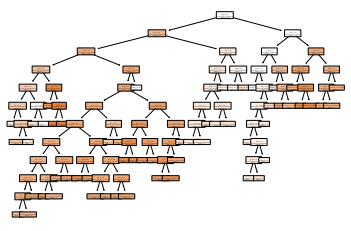

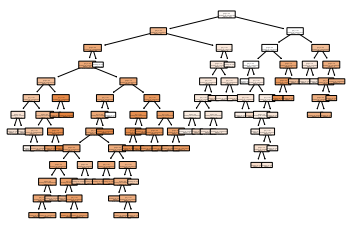

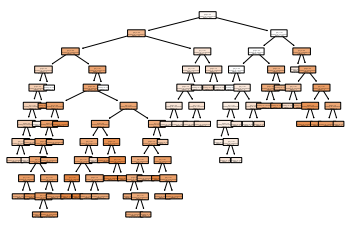

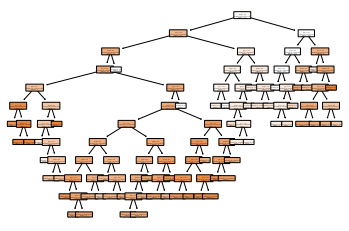

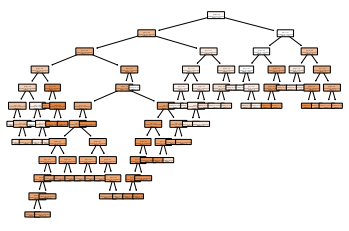

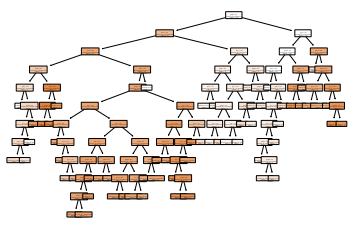

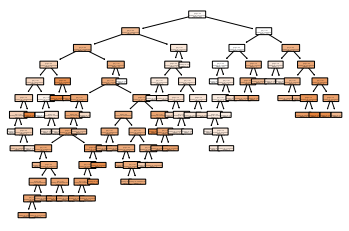

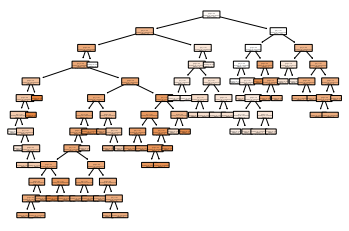

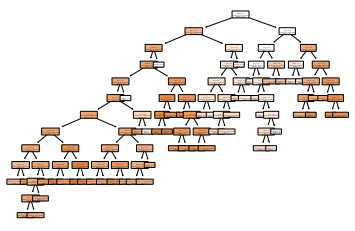

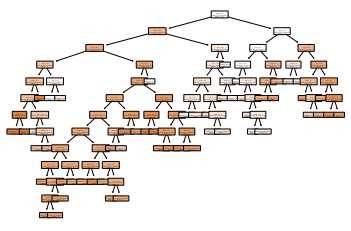

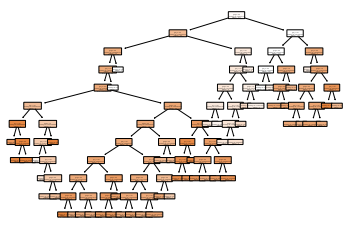

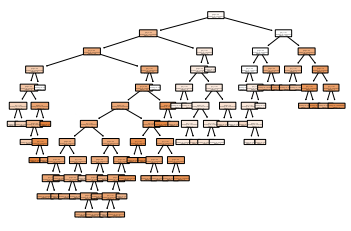

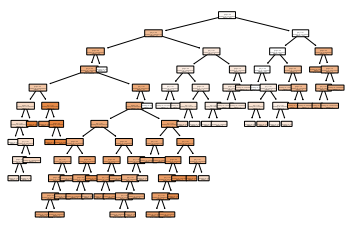

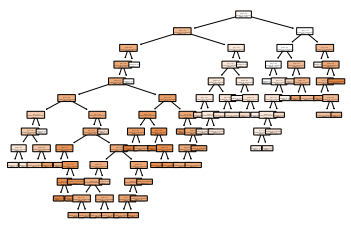

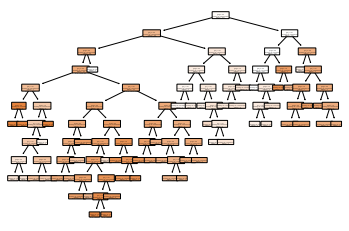

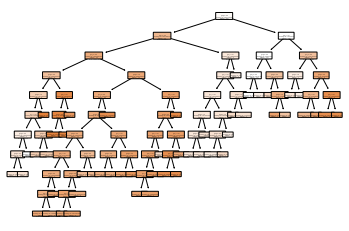

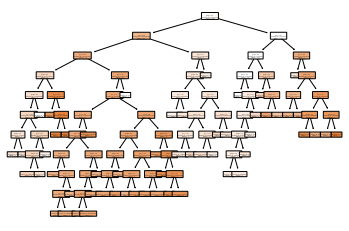

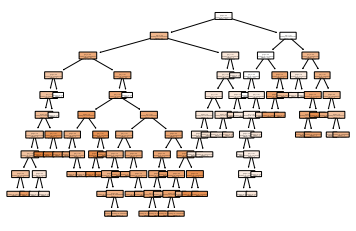

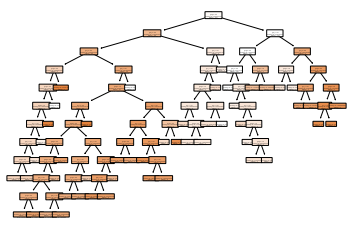

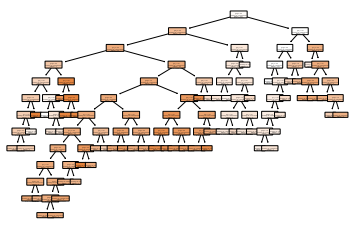

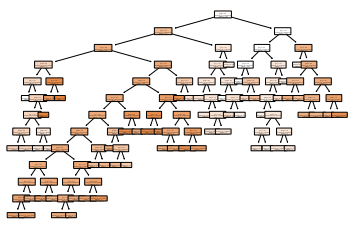

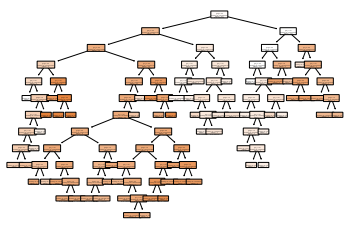

In [86]:
# Plot the Decision Trees from the Grid Search Random Forest

for x in range(len(grid.best_estimator_.estimators_)):
    tree.plot_tree(
    grid.best_estimator_.estimators_[x], # Access each individual estimator
    filled=True,
    rounded=True,
    )
    plt.show()



<hr>

<h2>Pipeline for Random Forest Regressor </h2> 

<h4>Split Data into X_pipe and y_pipe</h4>

In [ ]:
X_pipe = df.drop(['financing_value','project','social','transfer','income'],
            axis=1)
y_pipe= df['financing_value']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pipe, y_pipe, test_size=0.20, random_state=42)

In [ ]:
#Create a Pipeline for our model
pipe= Pipeline(
    steps=[
        ('standardscaler', StandardScaler()),
        ('pca', PCA()),
        ('randomforestregressor', RandomForestRegressor
         (n_estimators = 100,
          max_depth= 12,
          random_state = 0,
          criterion = 'mse'))])


In [ ]:
pipe.fit(X_train_p,y_train_p)
pipe.score(X_test_p, y_test_p)

pipe_pred = pipe.predict(X_test_p)

<h2> Comparison between the models before and after the pipeline</h2>

In [ ]:
 
print('Model evaluation before Pipline ')
print('------------------------------------')
print('R2 Result: ',r2_score(y_true=y_test, y_pred=preds_forest))
print('MAE Result: ', mean_absolute_error(y_true=y_test, y_pred=preds_forest))
print('MSE Result: ',mean_squared_error(y_true=y_test, y_pred=preds_forest))
print('\n\n')


print('Model evaluation after Pipeline ')
print('------------------------------------ ')
print('R2 Result: ',r2_score(y_true=y_test, y_pred=pipe_pred))
print('MAE Result: ', mean_absolute_error(y_true=y_test, y_pred=pipe_pred))
print('MSE Result: ',mean_squared_error(y_true=y_test, y_pred=pipe_pred))

👉🏼 [Data Dictionary](https://www.kaggle.com/na9ib4/social-development-bank-loans-for-2019-english-ver?select=Social+Development+Bank+Loans+For+2019.csv) 👈🏼